# Mechanics 
Coupled oscillators $m=f$

In [1]:
import numpy as np
from scipy.integrate import ode
import matplotlib.pyplot as plt

In [2]:
def two_masses_spring_eq(t, X, m1, m2, k):
    
    q1, q2, dq1, dq2 = X
    
    q1dot = dq1
    q2dot = dq2
    
    q1ddot = k/m1*(q2-q1)
    q2ddot = -k/m2*(q2-q1)
    
    return [q1dot, q2dot, q1ddot, q2ddot]

def two_masses_spring_gravity_eq(t, X, m1, m2, k):
    
    q1, q2, dq1, dq2 = X
    
    g = 9.8
    
    q1dot = dq1
    q2dot = dq2
    
    q1ddot = k/m1*(q2-q1) - g
    q2ddot = -k/m1*(q2-q1) - g 
    
    return [q1dot, q2dot, q1ddot, q2ddot]

In [35]:
m1 = 1
m2 = 1
k = 5

q10 = 0.5
q20 = 0.6
X0 = [0, 0, 0.25, 0]

t0 = 0
t1 = 2
dt = 1e-3

X = []
t = []

solver = ode(two_masses_spring_eq)
solver.set_integrator("dopri5")
solver.set_initial_value(X0, t0)
solver.set_f_params(m1,m2,k)

while solver.t < t1 and solver.successful():
    solver.integrate(solver.t+dt)
    X.append(solver.y)
    t.append(solver.t)

q1, q2, dq1, dq2 = np.array(X).T    

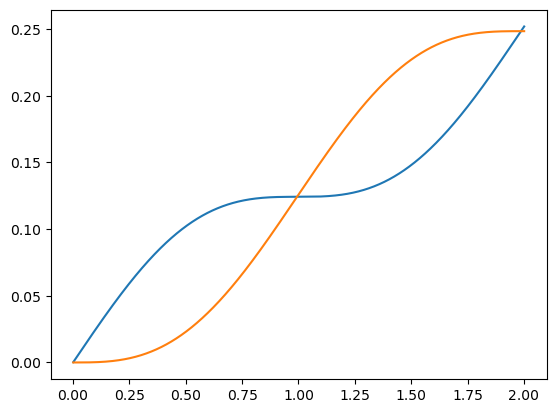

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


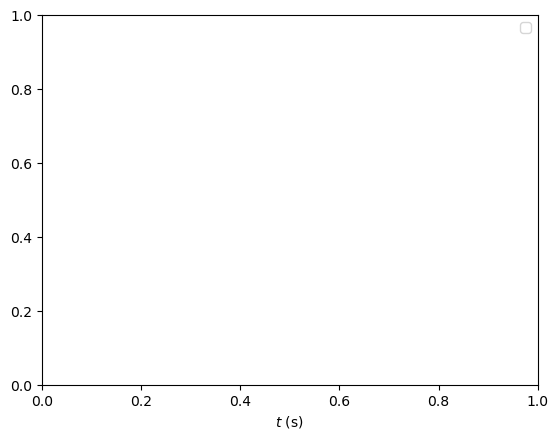

In [39]:
plt.figure()
plt.plot(t,q1, label=r'$q_1$')
plt.plot(t,q2, label=r'$q_2$')
plt.pause(1)
plt.legend()
plt.xlabel(r'$t$ (s)')
plt.show()

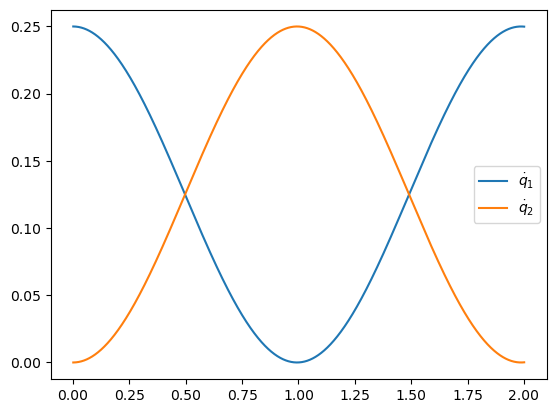

In [23]:
plt.figure()
plt.plot(t,dq1, label=r'$\dot{q}_1$')
plt.plot(t,dq2, label=r'$\dot{q}_2$')
plt.legend()
plt.show()

## Fall two masses attached to a spring under influence of gravity

In [27]:
m1 = 1
m2 = 1
k = 5

g  = 9.8
q10 = 0.05
q20 = m1/k*g+q10

X0 = [q10, q20, 0, 0]

t0 = 0
t1 = 2
dt = 1e-2

X = []
t = []

solver2 = ode(two_masses_spring_gravity_eq)
solver2.set_integrator("dopri5")
solver2.set_initial_value(X0, t0)
solver2.set_f_params(m1, m2, k)

while solver2.t < t1 and solver2.successful():
    solver2.integrate(solver2.t+dt)
    X.append(solver2.y)
    t.append(solver2.t)

q1, q2, dq1, dq2 = np.array(X).T    

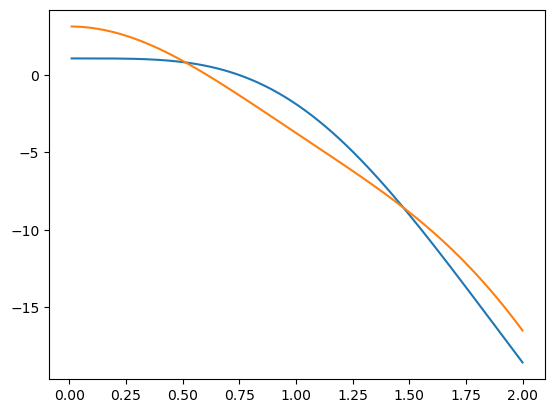

In [31]:
plt.figure()
plt.plot(t,q1+1)
plt.plot(t,q2+1+0.1)
plt.show()

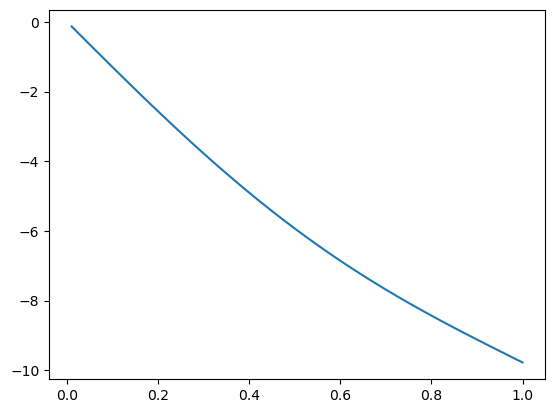

In [55]:
plt.figure()
plt.plot(t,(m1*dq1+m2*dq2)/(m1+m2))
plt.show()